In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [34]:
nltk.download('stopwords')
stopwords

[nltk_data] Downloading package stopwords to /home/leochc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<WordListCorpusReader in '/home/leochc/nltk_data/corpora/stopwords'>

In [35]:
#alamacenamos las stopwords en la variable stop_words
stop_words = set(stopwords.words('spanish')) 

In [36]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leochc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [37]:
data = pd.read_csv("comentarios_pelicula.csv")
len(data)

50000

In [38]:
data.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]>

In [39]:
#solo trabajamos con los 1000 priemeros datos
data = data[:1000]
len(data)

1000

In [40]:
data.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [41]:
#se discretiza la variable sentiment para obtener valores numericos
data['label'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

/tmp/ipykernel_18567/3778575969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)


In [42]:
data

,review,sentiment,label
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
995,Nothing is sacred. Just ask Ernie Fosselius. T...,positive,1
996,I hated it. I hate self-aware pretentious inan...,negative,0
997,I usually try to be professional and construct...,negative,0
998,If you like me is going to see this in a film ...,negative,0


In [43]:
#definimos la funcion para preporcesar los comentarios
def preprocess_text(text):
    # Eliminar caracteres especiales
    text = text.replace('<br /><br />', '')
    # Convertir a minúsculas
    text = text.lower()
    # Tokenización
    tokens = nltk.word_tokenize(text)
    # Eliminar stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Limitar a las primeras 150 palabras
    tokens = tokens[:150]
    # Unir tokens nuevamente en una cadena
    processed_text = ' '.join(tokens)
    return processed_text

In [44]:
#aplicamos el preporcesamiento a los datos
data['review'] = data['review'].apply(preprocess_text)

/tmp/ipykernel_18567/2642458145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['review'] = data['review'].apply(preprocess_text)


In [45]:
data

,review,sentiment,label
0,one of the other reviewers mentioned that afte...,positive,1
1,wonderful little production . the filming tech...,positive,1
2,i thought this was wonderful way to spend time...,positive,1
3,basically there 's family where little boy ( j...,negative,0
4,petter mattei 's `` love in the time of money ...,positive,1
...,...,...,...
995,nothing is sacred . just ask ernie fosselius ....,positive,1
996,i hated it . i hate self-aware pretentious ina...,negative,0
997,i usually try to be professional and construct...,negative,0
998,if you like is going to see this in film histo...,negative,0


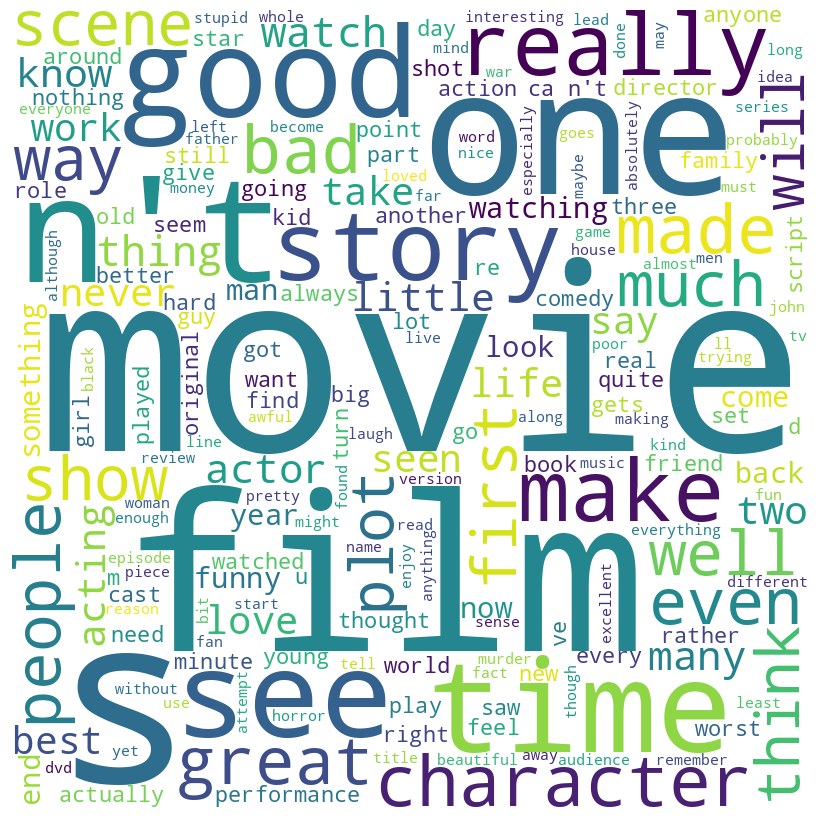

In [59]:
#vamos a crear el world cloud 
all_text = ''.join(data['review'])
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      min_font_size=10).generate(all_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [46]:
# Crear embeddings utilizando word2vec
sentences = [nltk.word_tokenize(review) for review in data['review']]
model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [47]:
# Crear matriz de características
X = np.zeros((len(sentences), 100))
for i, sentence in enumerate(sentences):
    vec = np.zeros((100,))
    for word in sentence:
        if word in model.wv:
            vec += model.wv[word]
    X[i] = vec

In [48]:
# Dividir los datos en entrenamiento y prueba
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Entrenar un modelo de regresión logística
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

/home/leochc/Documentos/notebooks/analisis de sentimientos 1 (comentarios de peliculas)/analisis sentimiento Peliculas/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Predecir etiquetas para los datos de prueba
y_pred = classifier.predict(X_test)

In [29]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

Precisión: 0.62


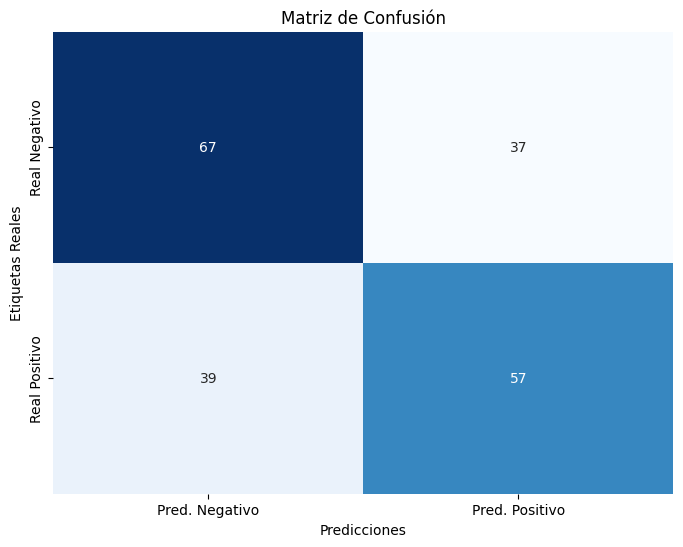

In [62]:
matriz_confusion = confusion_matrix(y_test, y_pred)

# Crear una figura
plt.figure(figsize=(8, 6))

# Crear la matriz de confusión utilizando Seaborn
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Pred. Negativo', 'Pred. Positivo'],
            yticklabels=['Real Negativo', 'Real Positivo'])

plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Reales')
plt.title('Matriz de Confusión')
plt.show()